In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [4]:
amazon=pd.read_csv("Amazon Sales data.csv")

# seeing first 5 data 

In [5]:
amazon.head(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


# seeing lst few data

In [6]:
amazon.tail()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02
99,Sub-Saharan Africa,Mozambique,Household,Offline,L,2/10/2012,665095412,2/15/2012,5367,668.27,502.54,3586605.09,2697132.18,889472.91


# Grouping data by 'Region' and summing up 'Total Revenue' and 'Total Profit'

In [7]:
grouped_data = amazon.groupby('Region')[['Total Revenue', 'Total Profit']].sum()

# Display the results
print(grouped_data)

                                   Total Revenue  Total Profit
Region                                                        
Asia                                 21347091.02    6113845.87
Australia and Oceania                14094265.13    4722160.03
Central America and the Caribbean     9170385.49    2846907.85
Europe                               33368932.11   11082938.63
Middle East and North Africa         14052706.58    5761191.86
North America                         5643356.55    1457942.76
Sub-Saharan Africa                   39672031.43   12183211.40


#According to the analysis Sub-Sahran Africa has highest total profit 

# Grouping by 'Country' and 'Item Type', and summing 'Units Sold'

In [8]:
grouped = amazon.groupby(['Country', 'Item Type'])['Units Sold'].sum()
grouped.head(5)

Country    Item Type      
Albania    Clothes            2269
Angola     Household          4187
Australia  Beverages          9389
           Cereal              682
           Office Supplies    2924
Name: Units Sold, dtype: int64

# Identifying the maximum of the summed 'Units Sold'

In [9]:
max_units_sold = grouped.max()
print(grouped)
print("Maximum units sold:", max_units_sold)

Country         Item Type      
Albania         Clothes            2269
Angola          Household          4187
Australia       Beverages          9389
                Cereal              682
                Office Supplies    2924
                                   ... 
Turkmenistan    Household          3830
                Office Supplies    5010
Tuvalu          Baby Food          9925
United Kingdom  Household           282
Zambia          Snacks             4085
Name: Units Sold, Length: 97, dtype: int64
Maximum units sold: 15739


#display both the grouped sums and the maximum value of 'Units Sold' among all the groups.

# Grouping by 'Item Type' and calculating mean values for 'Unit Price' and 'Unit Cost'

In [10]:
grouped_means = amazon.groupby('Item Type')[['Unit Price', 'Unit Cost']].mean()

print(grouped_means)

                 Unit Price  Unit Cost
Item Type                             
Baby Food            255.28     159.42
Beverages             47.45      31.79
Cereal               205.70     117.11
Clothes              109.28      35.84
Cosmetics            437.20     263.33
Fruits                 9.33       6.92
Household            668.27     502.54
Meat                 421.89     364.69
Office Supplies      651.21     524.96
Personal Care         81.73      56.67
Snacks               152.58      97.44
Vegetables           154.06      90.93


The analysis shows that selling price of unit is more than more than production cost i.e unit cost. hence we can asy that Higher differences between price and cost suggest higher profit margins

# What are the average days taken to ship the product for each region

In [40]:
amazon['Order Date'] = pd.to_datetime(amazon['Order Date'])
amazon['Ship Date'] = pd.to_datetime(amazon['Ship Date'])
amazon['Shipping Duration'] = (amazon['Ship Date'] - amazon['Order Date']).dt.days
average_shipping_days_by_region = amazon.groupby('Region')['Shipping Duration'].mean()
print(average_shipping_days_by_region)

Region
Asia                                 28.727273
Australia and Oceania                24.272727
Central America and the Caribbean    26.714286
Europe                               24.136364
Middle East and North Africa         24.200000
North America                        25.666667
Sub-Saharan Africa                   19.888889
Name: Shipping Duration, dtype: float64


# How does the sales channel (Online vs Offline) impact total sales and profits?

In [11]:
amzon_aggregate = amazon.groupby('Sales Channel').agg({
    'Total Revenue': 'sum',
    'Total Profit': 'sum'
})

print(amzon_aggregate)

               Total Revenue  Total Profit
Sales Channel                             
Offline          79094809.20   24920726.67
Online           58253959.11   19247471.73


In [12]:
summary = amazon.groupby('Sales Channel')[['Total Revenue', 'Total Profit']].sum()

# Calculate profit margin for each year
summary['Profit Margin'] = (summary['Total Profit'] / summary['Total Revenue']) * 100

# Display the result
print(summary[['Profit Margin']])

               Profit Margin
Sales Channel               
Offline            31.507411
Online             33.040624


# How many units were sold overall for each Sales Channel

In [37]:
units_sold_by_channel = amazon.groupby('Sales Channel')['Units Sold'].sum()
print(units_sold_by_channel)

Sales Channel
Offline    276782
Online     236089
Name: Units Sold, dtype: int64


# Calculate the sum of the Total Revenue

In [13]:
total_revenue_sum = amazon['Total Revenue'].sum()

# Display the result
print("Total Revenue Sum: $", total_revenue_sum)

Total Revenue Sum: $ 137348768.31


# Calculate the sum of the Unit Cost

In [14]:
total_unit_cost_sum = amazon['Unit Cost'].sum()

# Display the result
print("Unit cost Sum: $",total_unit_cost_sum)

Unit cost Sum: $ 19104.8


# Calculate the sum of the Units Sold

In [15]:
total_unit_sold_sum = amazon['Units Sold'].sum()

# Display the result
print("Unit sold Sum: ",total_unit_sold_sum)

Unit sold Sum:  512871


# Finding the year having more revenue and calculating which year has highest profit margine

In [16]:
# Convert 'Order Date' to datetime format
amazon['Order Date'] = pd.to_datetime(amazon['Order Date'])

# Extract the year from 'Order Date'
amazon['Year'] = amazon['Order Date'].dt.year

# Group by the extracted year and sum 'Revenue' and 'Profit'
yearly_summary = amazon.groupby('Year').agg({
    'Total Revenue': 'sum',
    'Total Profit': 'sum'
})

print(yearly_summary)

      Total Revenue  Total Profit
Year                             
2010    19186024.92    6629567.43
2011    11129166.07    2741008.23
2012    31898644.52    9213010.12
2013    20330448.66    6715420.04
2014    16630214.43    5879461.68
2015    12427982.86    3996539.44
2016    12372867.22    4903838.01
2017    13373419.63    4089353.45


year 2012  had the highest amount of total revenue and profit compared to other years

In [17]:
summary = amazon.groupby('Year')[['Total Revenue', 'Total Profit']].sum()

# Calculate profit margin for each year
summary['Profit Margin'] = (summary['Total Profit'] / summary['Total Revenue']) * 100

# Display the result
print(summary[['Profit Margin']])

      Profit Margin
Year               
2010      34.554148
2011      24.629053
2012      28.882137
2013      33.031342
2014      35.354094
2015      32.157587
2016      39.633805
2017      30.578218


year 2016 had the most profit margin

# Which item types yield the highest profit margins?

In [18]:
# Calculate profit margin for each row
amazon['Profit Margin'] = amazon['Total Profit'] / amazon['Total Revenue']

# Group by 'Item Type' and calculate average profit margins
average_margins = amazon.groupby('Item Type')['Profit Margin'].mean()

print(average_margins)

Item Type
Baby Food          0.375509
Beverages          0.330032
Cereal             0.430676
Clothes            0.672035
Cosmetics          0.397690
Fruits             0.258307
Household          0.247999
Meat               0.135580
Office Supplies    0.193870
Personal Care      0.306619
Snacks             0.361384
Vegetables         0.409775
Name: Profit Margin, dtype: float64


Clothes yield the highest percentage of profit relative to their total revenue.

# What is the effect of order priority on shipping times

In [19]:
# Convert 'Order Date' and 'Ship Date' to datetime format
amazon['Order Date'] = pd.to_datetime(amazon['Order Date'])
amazon['Ship Date'] = pd.to_datetime(amazon['Ship Date'])

# Calculate shipping duration as the number of days between 'Ship Date' and 'Order Date'
amazon['Shipping Duration'] = (amazon['Ship Date'] - amazon['Order Date']).dt.days

# Analyzing shipping duration across different 'Order Priority' levels
duration_by_priority = amazon.groupby('Order Priority')['Shipping Duration'].mean()

print(duration_by_priority)

Order Priority
C    23.863636
H    21.400000
L    23.592593
M    25.333333
Name: Shipping Duration, dtype: float64


'H' has the shortest average shipping duration at 21.4 days.
Here,
'H' (possibly High) shows the fastest shipping time.
'M' (possibly Medium) has the longest average shipping duration.
'C' and 'L' could stand for other specific prioritizations like "Critical" or "Low,"

# How do unit sales correlate with total profit

In [20]:
correlation = amazon['Units Sold'].corr(amazon['Total Profit'])

# Print the correlation coefficient
print("Correlation Coefficient between 'Units Sold' and 'Total Profit':", correlation)

Correlation Coefficient between 'Units Sold' and 'Total Profit': 0.5645504620845976


The correlation coefficient value of 0.56455 indicates a positive correlation between the two variables. This means that as the number of units sold increases, the total profit generally increases as well.

# Which countries have the best and worst profit to sales ratios

In [21]:
amazon['Profit_to_Sales_Ratio'] = amazon['Total Profit'] / amazon['Units Sold']

# Handle any potential divisions by zero (if any sales are zero, this could be an issue)
amazon['Profit_to_Sales_Ratio'] = amazon['Profit_to_Sales_Ratio'].replace([float('inf'), -float('inf')], None)

# Group by country and calculate the average profit to sales ratio
average_ratios_by_country = amazon.groupby('Country')['Profit_to_Sales_Ratio'].mean()

# Print the average profit to sales ratios by country
print("Average Profit to Sales Ratio by Country:")
average_ratios_by_country.head(10)

Average Profit to Sales Ratio by Country:


Country
Albania          73.440000
Angola          165.730000
Australia        76.833333
Austria         173.870000
Azerbaijan      150.060000
Bangladesh       73.440000
Belize           73.440000
Brunei          126.250000
Bulgaria         99.845000
Burkina Faso     63.130000
Name: Profit_to_Sales_Ratio, dtype: float64

 Several countries have the same highest ratio, which is 173.870. These countries include Austria, France, Haiti, Iceland, Iran, Pakistan, Romania, Samoa.

 The countries with the lowest ratio of 2.410 are Kiribati, Kuwait, Lesotho, Malaysia, and New Zealand.

# What is the distribution of unit prices across all item types?

In [22]:
# Ensure that data types are appropriate for plotting
amazon['Unit Price'] = pd.to_numeric(amazon['Unit Price'], errors='coerce')
amazon['Item Type'] = amazon['Item Type'].astype(str)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

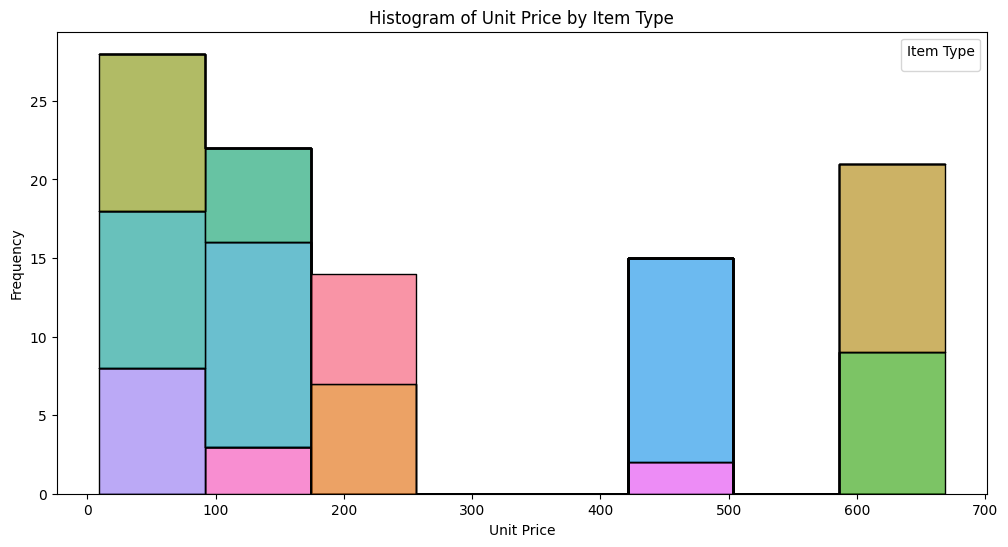

In [23]:
plt.figure(figsize=(12, 6))
sns.histplot(data=amazon, x='Unit Price', hue='Item Type', element='step', multiple='stack')
plt.title('Histogram of Unit Price by Item Type')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.legend(title='Item Type')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


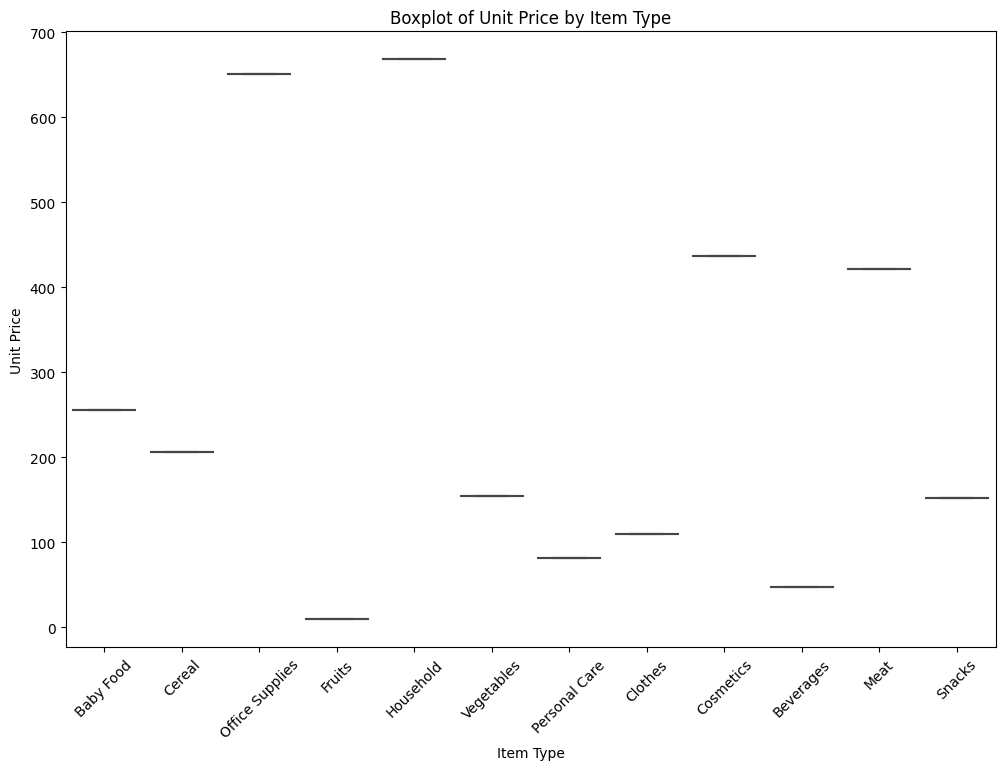

In [24]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=amazon, x='Item Type', y='Unit Price')
plt.title('Boxplot of Unit Price by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Unit Price')
plt.xticks(rotation=45)  # Rotates the labels on the x-axis to make them more readable
plt.show()

the box plot show tht household items have the higest Unit Price

# Which region has the highest total revenue and total profit?

In [25]:
# Group data by 'Region' and calculate total revenue and profit
region_totals = amazon.groupby('Region').agg({
    'Total Revenue': 'sum',
    'Total Profit': 'sum'
}).reset_index()

print(region_totals)

                              Region  Total Revenue  Total Profit
0                               Asia    21347091.02    6113845.87
1              Australia and Oceania    14094265.13    4722160.03
2  Central America and the Caribbean     9170385.49    2846907.85
3                             Europe    33368932.11   11082938.63
4       Middle East and North Africa    14052706.58    5761191.86
5                      North America     5643356.55    1457942.76
6                 Sub-Saharan Africa    39672031.43   12183211.40


In [26]:
highest_revenue_region = region_totals.loc[region_totals['Total Revenue'].idxmax()]
highest_profit_region = region_totals.loc[region_totals['Total Profit'].idxmax()]

print(f"The region with the highest total revenue is {highest_revenue_region['Region']} with ${highest_revenue_region['Total Revenue']:.2f}")
print(f"The region with the highest total profit is {highest_profit_region['Region']} with ${highest_profit_region['Total Profit']:.2f}")

The region with the highest total revenue is Sub-Saharan Africa with $39672031.43
The region with the highest total profit is Sub-Saharan Africa with $12183211.40


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


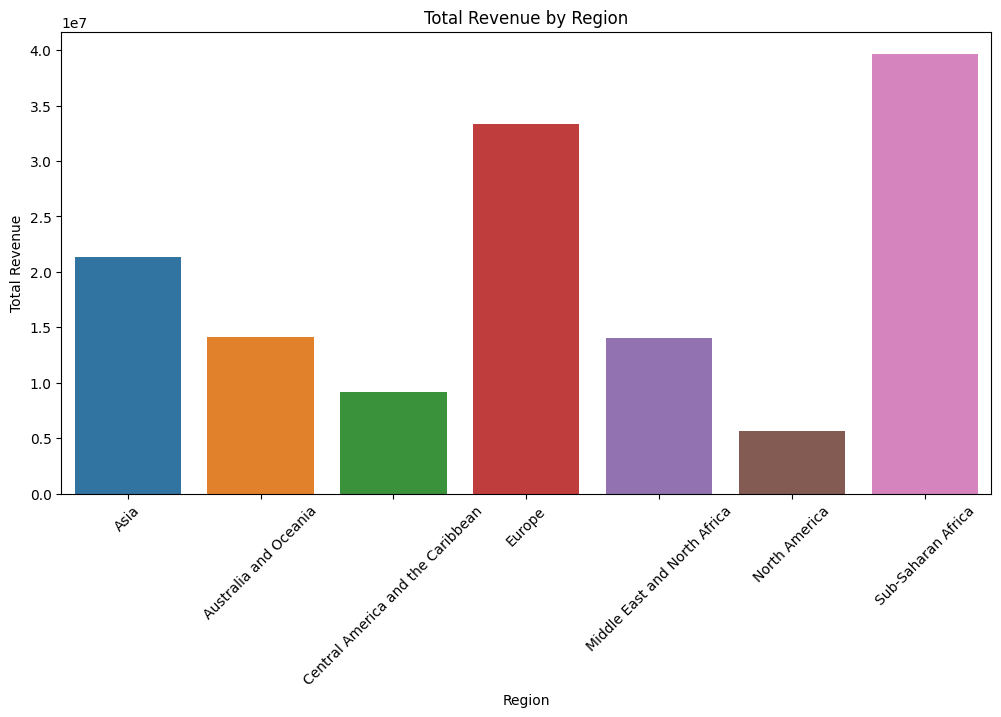

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


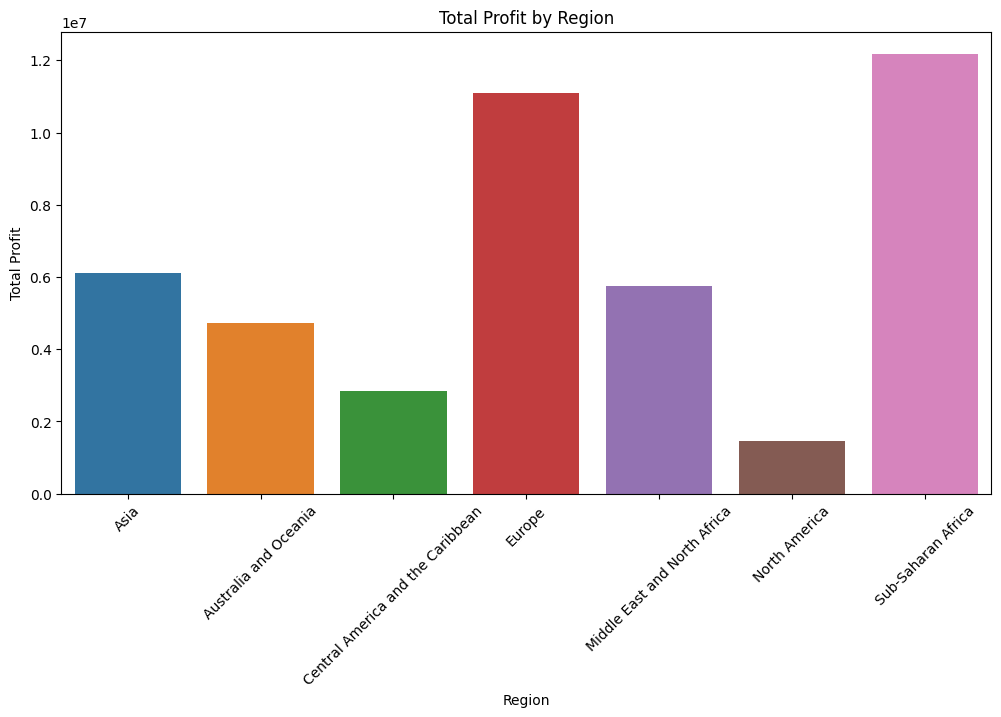

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Total Revenue', data=region_totals)
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Total Profit', data=region_totals)
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

with the help of graph it can be seen tht Sub-Sahaaran Africa has highest Total Profit and Total Revenue

# Which country has the highest profit in the Sub-Saharan Africa region

In [33]:
max_profit_country = amazon[amazon['Region'] == 'Sub-Saharan Africa'].sort_values(by='Total Profit', ascending=False).iloc[0]['Country']
print(max_profit_country)

Djibouti


# Which country has the Lowest profit in the Sub-Saharan Africa region

In [35]:
max_profit_country = amazon[amazon['Region'] == 'Sub-Saharan Africa'].sort_values(by='Total Profit', ascending=True).iloc[0]['Country']
print(max_profit_country)

Mali


# Sales_trend -> month-wise, year-wise, yearly_month-wise

In [28]:
# Convert 'Order Date' to datetime
amazon['Order Date'] = pd.to_datetime(amazon['Order Date'])

#  Extract Year and Month from 'Order Date'
amazon['Year'] = amazon['Order Date'].dt.year
amazon['Month'] = amazon['Order Date'].dt.month

#Aggregate Total Revenue by Year, Month, and Year-Month
annual_sales = amazon.groupby('Year')['Total Revenue'].sum()
monthly_sales = amazon.groupby('Month')['Total Revenue'].sum()
year_month_sales = amazon.groupby(['Year', 'Month'])['Total Revenue'].sum()


Text(0, 0.5, 'Total Revenue')

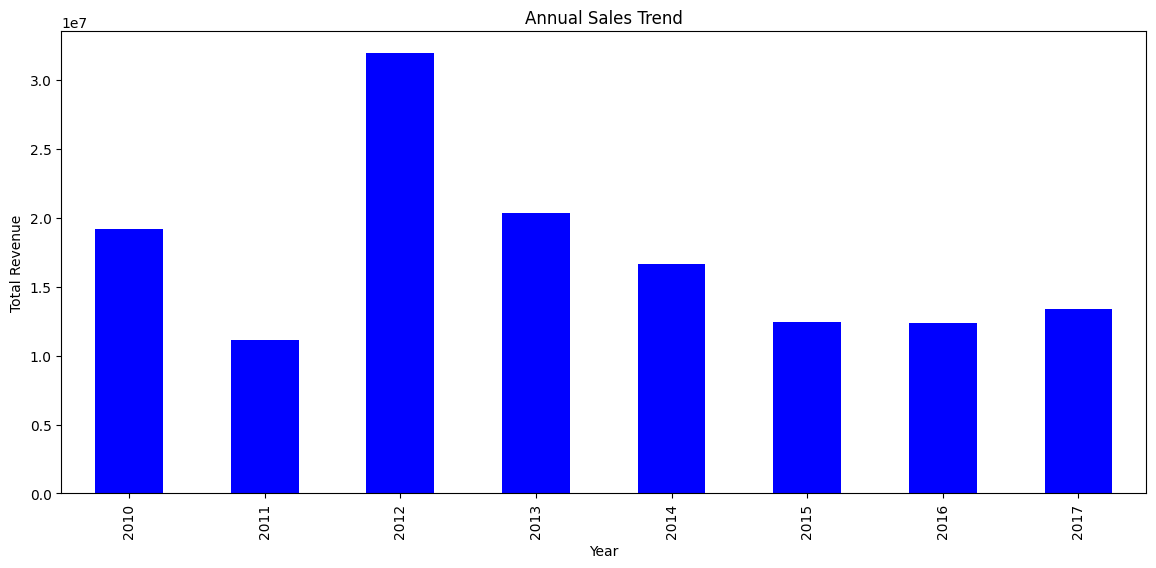

In [29]:
# Plotting the trends
plt.figure(figsize=(14, 6))
annual_sales.plot(kind='bar', color='blue')
plt.title('Annual Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')

Year 2012 has maximum sales

Text(0, 0.5, 'Total Revenue')

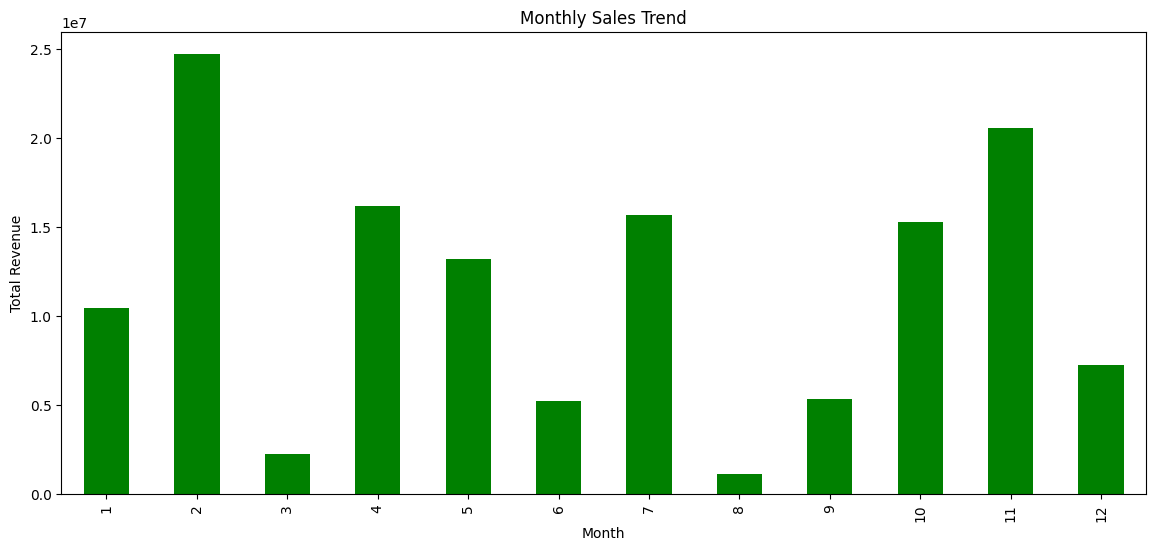

In [30]:
plt.figure(figsize=(14, 6))
monthly_sales.plot(kind='bar', color='green')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')


Feb month has the highest sales 

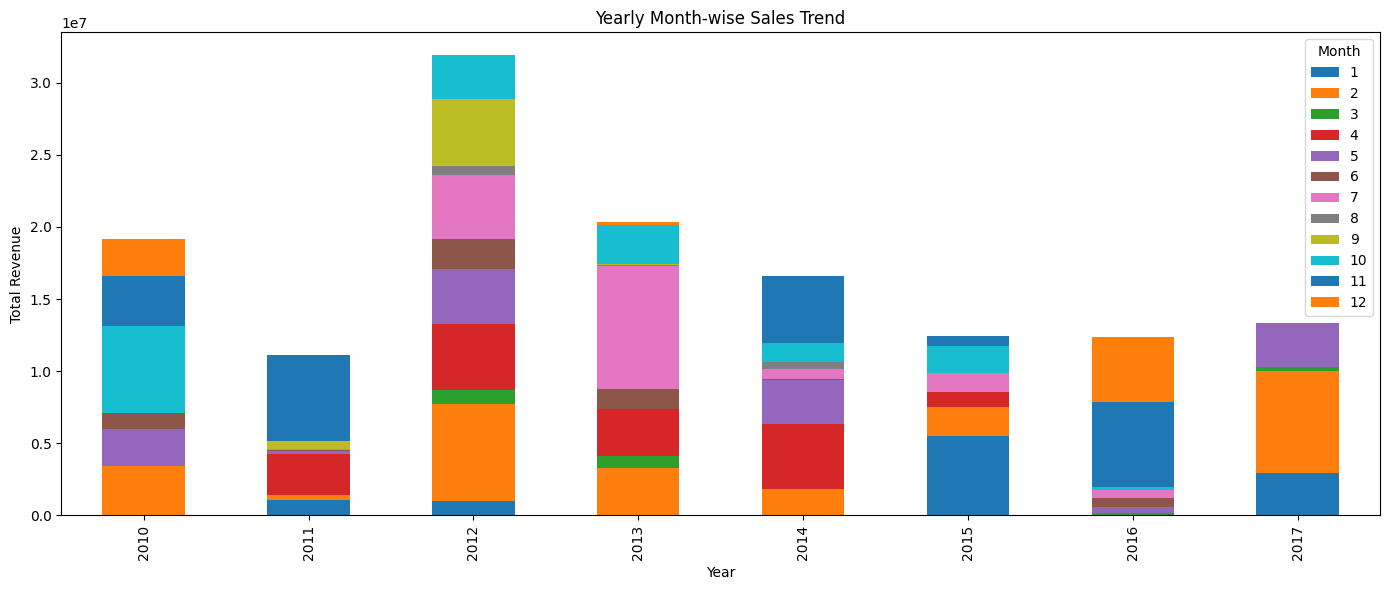

In [31]:
year_month_sales.unstack().plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title('Yearly Month-wise Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.tight_layout()


It can been seen that in 2010 - October hd most sales, 2011 - November had most sales, 2012 - Feb had most sales, 2013 - July had most sales,
2014- march and november had most sles, 2015 - Jan hd most sales, 2016 - November had most sales, 2017 - feb had most sales

# What is the average unit price for each Item Type sold in different regions

In [34]:
average_price_by_region_item = amazon.groupby(['Region', 'Item Type'])['Unit Price'].mean()
print(average_price_by_region_item)

Region                             Item Type      
Asia                               Clothes            109.28
                                   Cosmetics          437.20
                                   Fruits               9.33
                                   Household          668.27
                                   Office Supplies    651.21
                                   Personal Care       81.73
                                   Vegetables         154.06
Australia and Oceania              Baby Food          255.28
                                   Beverages           47.45
                                   Cereal             205.70
                                   Clothes            109.28
                                   Cosmetics          437.20
                                   Fruits               9.33
                                   Meat               421.89
                                   Office Supplies    651.21
Central America and the Caribbean 

# What is the total profit per unit sold for each Item Type

In [38]:
profit_per_unit = amazon['Total Profit'] / amazon['Units Sold']
amazon['Profit Per Unit'] = profit_per_unit
total_profit_per_unit_by_item = amazon.groupby('Item Type')['Profit Per Unit'].mean()
print(total_profit_per_unit_by_item)

Item Type
Baby Food           95.86
Beverages           15.66
Cereal              88.59
Clothes             73.44
Cosmetics          173.87
Fruits               2.41
Household          165.73
Meat                57.20
Office Supplies    126.25
Personal Care       25.06
Snacks              55.14
Vegetables          63.13
Name: Profit Per Unit, dtype: float64
